In [148]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [149]:
results = dict()

data_dir = "results"
for file_path in os.listdir(data_dir):
    with open(os.path.join(data_dir, file_path)) as f:
        results[file_path[:-5]] = json.load(f)

In [150]:
def get_result_table(statistic_name: str):
    tmp_dict = dict()
    problem_names=list()
    for name, data in results.items():
        problem_name, solver_name = name.split("-")
        if problem_name not in problem_names:
            problem_names.append(problem_name)
        if solver_name not in tmp_dict:
            tmp_dict[solver_name] = []
        tmp_dict[solver_name].append(data[statistic_name])
    return pd.DataFrame(tmp_dict, index=problem_names)

def get_result_table_average(statistic_name: str, solver_names: list=[]):
    tmp_dict = dict()
    problem_names=list()
    for name, data in results.items():
        problem_name, solver_name = name.split("-")
        if solver_names and solver_name not in solver_names:
            continue
        if problem_name not in problem_names:
            problem_names.append(problem_name)
        if solver_name not in tmp_dict:
            tmp_dict[solver_name] = []
        tmp_dict[solver_name].append(
            np.average([solution[statistic_name] for solution in data["solutions"]])
            )
    return pd.DataFrame(tmp_dict, index=problem_names)

def get_unaggregated_results(statistics_names: list, solver_name: str, problem_name: str):
    tmp_dict = {statistic_name: [] for statistic_name in statistics_names}
    for name, data in results.items():
        _problem_name, _solver_name = name.split("-")
        if _problem_name == problem_name and _solver_name == solver_name:
            for solution in data['solutions']:
                for statistic_name in statistics_names:
                    tmp_dict[statistic_name].append(solution[statistic_name])
    return pd.DataFrame(tmp_dict)


In [151]:
avg_times = get_result_table("avg_time")
avg_times.head()

,GreedySearchSolver,SimulatedAnnealingSolver,SteepestSearchSolver,TabuSearchSolver
bur26a,0.002487,0.130848,0.003466,0.045715
chr12a,0.000129,0.026390,0.000157,0.047236
chr22a,0.000868,0.111730,0.001327,0.032236
els19,0.001138,0.062346,0.001958,0.120700
esc32e,0.000419,0.054476,0.001266,0.034894


In [152]:
avg_cost = get_result_table_average("cost")
avg_cost.head()

,GreedySearchSolver,SimulatedAnnealingSolver,SteepestSearchSolver,TabuSearchSolver
bur26a,5.445121e+06,5.435731e+06,5.444018e+06,5.456492e+06
chr12a,1.430268e+04,1.156771e+04,1.389021e+04,1.004979e+04
chr22a,6.985760e+03,6.546143e+03,7.011614e+03,7.395188e+03
els19,2.253350e+07,2.066616e+07,2.155716e+07,1.994880e+07
esc32e,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00


In [153]:
optimum = get_result_table("optimal_cost")
avg_dist_to_optimum = avg_cost / optimum
avg_dist_to_optimum.head()

,GreedySearchSolver,SimulatedAnnealingSolver,SteepestSearchSolver,TabuSearchSolver
bur26a,1.003400,1.001670,1.003197,1.005495
chr12a,1.497349,1.211025,1.454168,1.052113
chr22a,1.134789,1.063376,1.138989,1.201298
els19,1.309132,1.200645,1.252410,1.158968
esc32e,1.000000,1.000000,1.000000,1.000000


In [154]:
avg_evaluated_solutions = get_result_table_average("iteration_counts")
avg_evaluated_solutions.head()

,GreedySearchSolver,SimulatedAnnealingSolver,SteepestSearchSolver,TabuSearchSolver
bur26a,5637.625310,79848.200000,7203.640777,3855.041667
chr12a,370.679292,38256.804878,504.821997,3727.714286
chr22a,2205.953509,115319.000000,3383.213514,3563.437500
els19,3410.261876,54400.777778,2781.264706,3600.461538
esc32e,721.774958,1970.750000,2224.807062,2067.911765


In [155]:
avg_steps = get_result_table_average("step_count")
avg_steps.head()

,GreedySearchSolver,SimulatedAnnealingSolver,SteepestSearchSolver,TabuSearchSolver
bur26a,94.446650,0.0,21.165049,3855.041667
chr12a,14.166753,0.0,6.648818,3727.714286
chr22a,34.864035,0.0,13.645946,3563.437500
els19,55.554202,0.0,15.264706,3600.461538
esc32e,6.250000,0.0,3.485498,2067.911765


In [156]:
avg_steps = get_result_table_average("step_count")
problem_order = sorted(avg_steps.index, key=lambda x: int(''.join(filter(str.isdigit, x))))

In [157]:
def get_result_table_with_std(statistic_name: str):
    """Get mean and std of a statistic across solutions for each solver and problem"""
    means = dict()
    stds = dict()
    problem_names = []
    
    for name, data in results.items():
        problem_name, solver_name = name.split("-")
        if problem_name not in problem_names:
            problem_names.append(problem_name)
        if solver_name not in means:
            means[solver_name] = []
            stds[solver_name] = []
            
        values = [solution[statistic_name] for solution in data["solutions"]]
        means[solver_name].append(np.mean(values))
        stds[solver_name].append(np.std(values))
        
    return pd.DataFrame(means, index=problem_names), pd.DataFrame(stds, index=problem_names)

In [158]:
import matplotlib.pyplot as plt

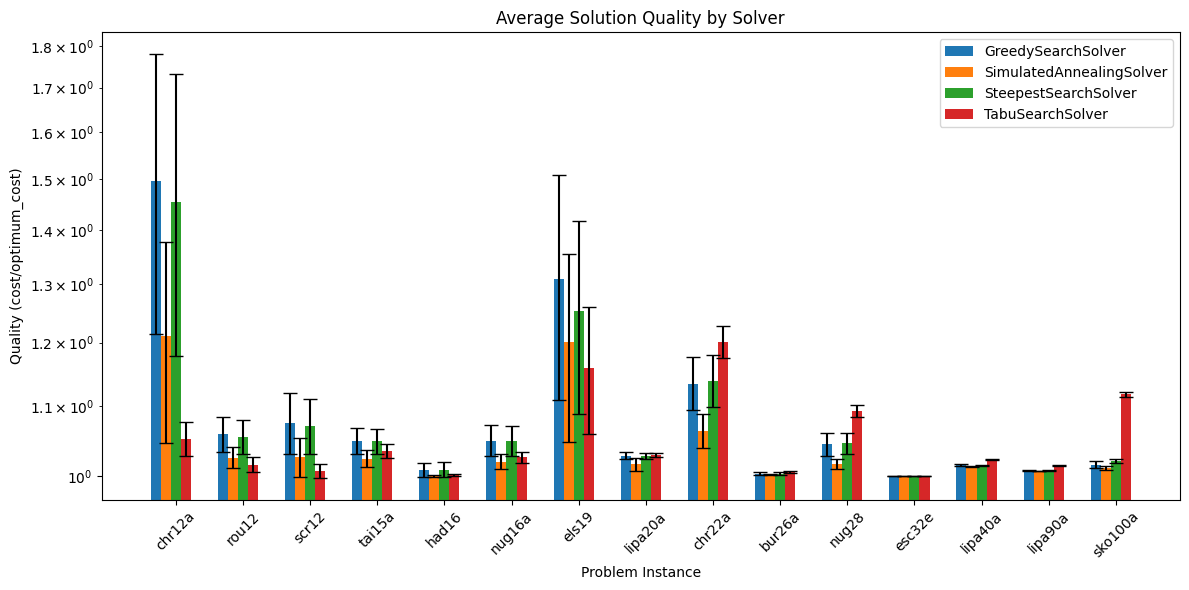

In [159]:
means_cost, stds_cost = get_result_table_with_std("cost")
optimum = get_result_table("optimal_cost")
quality_means = means_cost / optimum
quality_stds = stds_cost / optimum

plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(quality_means.index))

quality_means = quality_means.reindex(problem_order) 
quality_stds = quality_stds.reindex(problem_order) 

for i, solver in enumerate(quality_means.columns):
    plt.bar(index + i * bar_width, 
            quality_means[solver], 
            bar_width,
            yerr=quality_stds[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Quality (cost/optimum_cost)')
plt.title('Average Solution Quality by Solver')
plt.xticks(index + bar_width * 2, quality_means.index, rotation=45)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()

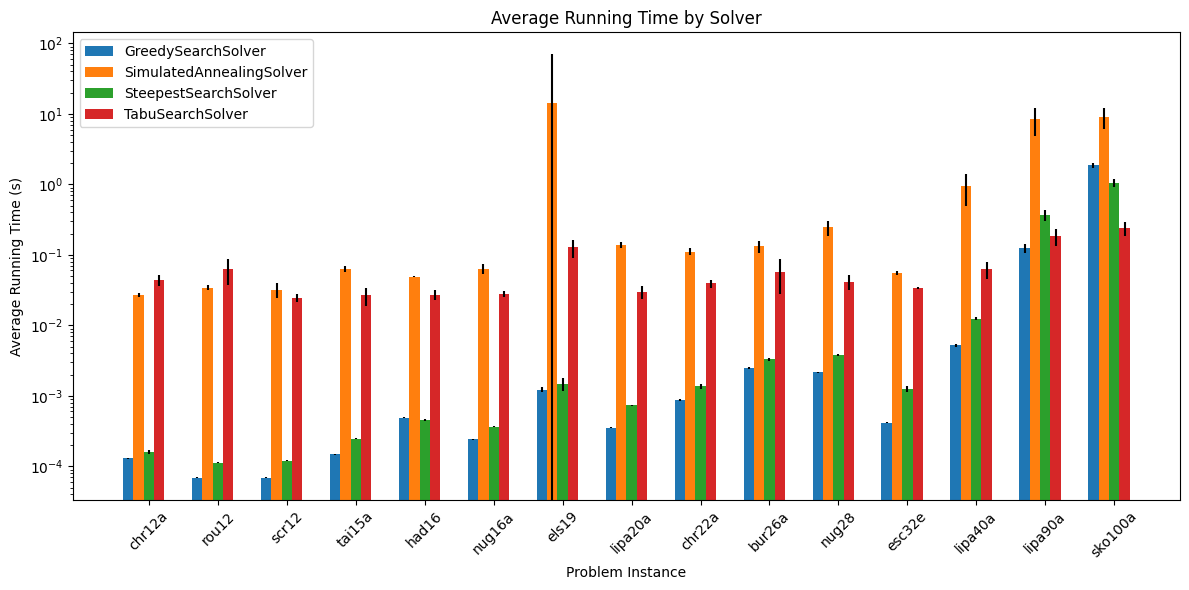

In [160]:
means_time, std_time = get_result_table_with_std("avg_time")

means_time = means_time.reindex(problem_order) 
std_time = std_time.reindex(problem_order) 

plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(means_time.index))

for i, solver in enumerate(means_time.columns):
    plt.bar(index + i * bar_width, 
            means_time[solver], 
            bar_width,
            yerr=std_time[solver],
            label=solver)

plt.xlabel('Problem Instance')
plt.ylabel('Average Running Time (s)')
plt.title('Average Running Time by Solver')
plt.xticks(index + bar_width * 2, means_time.index, rotation=45)
plt.yscale('log')  # Set log scale for y-axis
plt.legend()
plt.tight_layout()
plt.show()

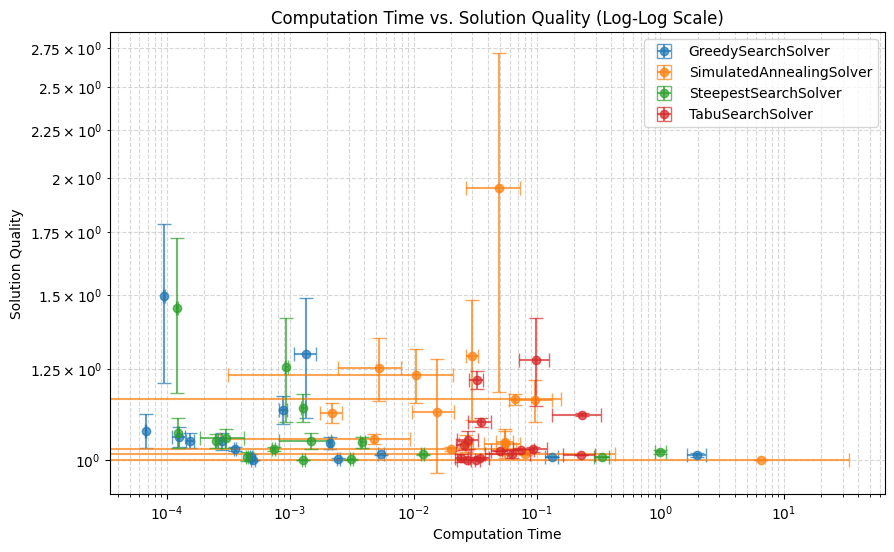

In [134]:
# Assuming the four DataFrames: quality_means, quality_stds, means_time, std_time
plt.figure(figsize=(10, 6))

# Iterate over solvers
for solver in quality_means.columns:
    plt.errorbar(
        means_time[solver], quality_means[solver],  # Swap X and Y
        xerr=std_time[solver], yerr=quality_stds[solver],  # Swap X and Y error bars
        fmt='o', label=solver, capsize=5, alpha=0.7  # Styling
    )

# Set logarithmic scales
plt.xscale("log")  # Computation time on X-axis (log scale)
plt.yscale("log")  # Solution quality on Y-axis (log scale)

plt.xlabel("Computation Time")
plt.ylabel("Solution Quality")
plt.title("Computation Time vs. Solution Quality (Log-Log Scale)")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.5)  # "both" applies to minor & major ticks
plt.show()


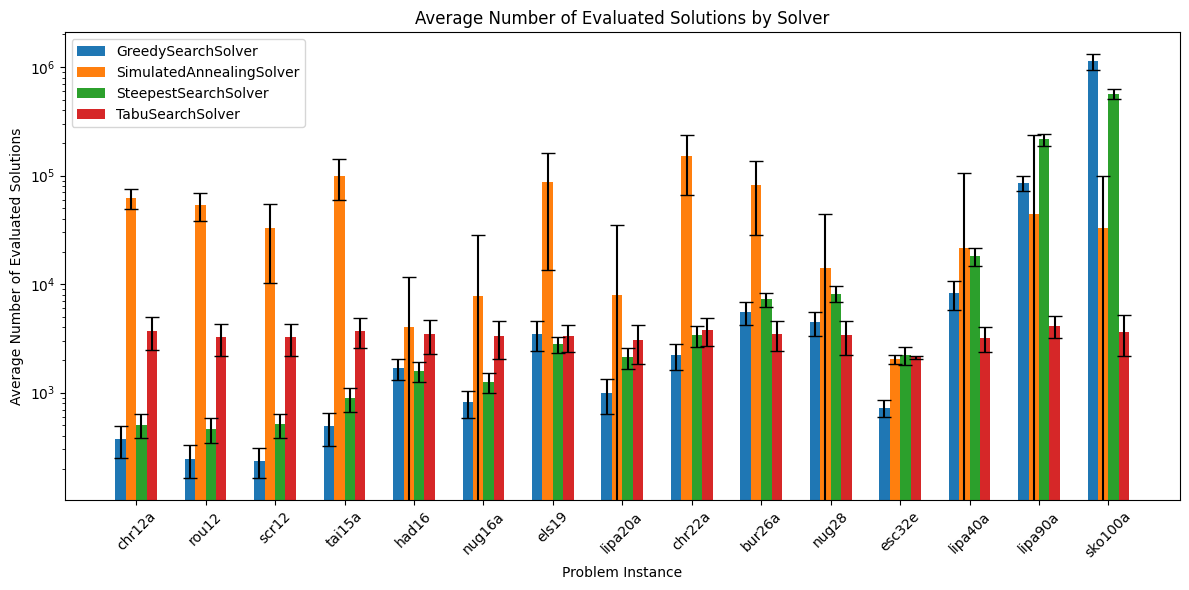

In [135]:
means_evals, stds_evals = get_result_table_with_std("iteration_counts")


means_evals = means_evals.reindex(problem_order) 
stds_evals  = stds_evals.reindex(problem_order) 


plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(means_evals.index))

for i, solver in enumerate(means_evals.columns):
    plt.bar(index + i * bar_width, 
            means_evals[solver], 
            bar_width,
            yerr=stds_evals[solver],
            label=solver,
            capsize=5)

plt.xlabel('Problem Instance')
plt.ylabel('Average Number of Evaluated Solutions')
plt.title('Average Number of Evaluated Solutions by Solver')
plt.xticks(index + bar_width * 1.5, means_evals.index, rotation=45)
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()
